i= 0 Q ост= 32440.223953959863
i= 1 Q ост= 4144.364489354495
i= 2 Q ост= 27946.041181951477
i= 3 Q ост= 16147.4608506743
i= 4 Q ост= 6181.204502118162
i= 5 Q ост= 2163.4183732316483
i= 6 Q ост= 3141.6336518851895
i= 7 Q ост= 3476.334955364265
i= 8 Q ост= 235.00002609099292
i= 9 Q ост= 556.8754918635972
F= [[ 10. 121. 110.]
 [  6.  16.  24.]
 [  5. 225.  75.]
 [  6.  16.  24.]
 [  8.   9.  24.]
 [  6. 121.  66.]
 [  4. 196.  56.]
 [ 11. 256. 176.]
 [  4.  36.  24.]
 [  5.  81.  45.]
 [  8. 256. 128.]
 [  3.  36.  18.]]
A= [[4.75412987]
 [1.02300112]
 [0.99189688]]
i= 8 func= (<function rx1 at 0x7f8eeaf492f0>, <function rx2_2 at 0x7f8eeaf49bf8>, <function rx2x1 at 0x7f8eeaf49f28>)


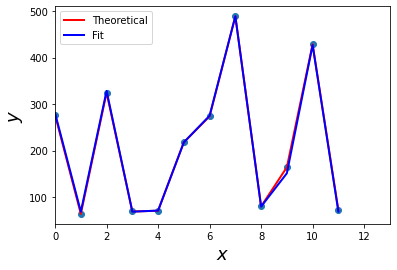

In [40]:
from itertools import *
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy 
import scipy.optimize as opt
import scipy.integrate as integrate

def r0(x1,x2):
  return 0
def r1(x1,x2):
  return 1
def rx1(x1,x2):
  return x1
def rx2(x1,x2):
  return x2
def rx1_2(x1,x2):
  return x1*x1
def rx2_2(x1,x2):
  return x2*x2
def rx2x1(x1,x2):
  return x2*x1

arm=[rx1,rx2,rx2_2,rx2x1]

def Get_F(i:int,RRR):#возвр.матр. F
  count_r=len(RRR[i])
  F=np.zeros((n1,count_r  ))#M: 12 x кол-во регрессоров
  for it in range(n1):
    for j in range(count_r):
      F[it][j]=RRR[i][j](X1[it][0],X2[it][0])
  return F

def Get_res_s(it:int,A):
  xx0=[]
  xx1=[]
  xx2=[]
  yy0=[]
  yynew=[]
  for i in range(n1):
    xx0.append(i)
    xx1.append(X1[i][0])
    xx2.append(X2[i][0])
    yy0.append(Y0[i][0])
    tmp=0.0
    for j in range(len(A)):
      tmp+=A[j][0]*RRR[it][j](X1[i][0],X2[i][0])
    yynew.append(tmp)
  return xx0,xx1,xx2,yy0,yynew

def Get_Grafic(xx0,yy0,yynew):
  fig, ax = plt.subplots()
  ax.scatter(xx0, yy0)
  ax.plot(xx0, yy0, 'r', lw=2, label="Theoretical")
  ax.plot(xx0, yynew, 'b', lw=2, label="Fit")
  ax.legend()
  ax.set_xlim(0, 13)
  ax.set_xlabel(r"$x$", fontsize=18)
  ax.set_ylabel(r"$y$", fontsize=18)
  plt.show()
  return


n1=12
n2=10
##вектор x1,x2,y
X1=np.array([
   [10.0],
   [6.0],
   [5.0],
   [6.0],
   [8.0],
   [6.0],
   [4.0],
   [11.0],
   [4.0],
   [5.0],
   [8.0],
   [3.0],
   [3.0]
])

X2=np.array([
   [11.0],
   [4.0],
   [15.0],
   [4.0],
   [3.0],
   [11.0],
   [14.0],
   [16.0],
   [6.0],
   [9.0],
   [16.0],
   [6.0],
   [10.0]
])

Y0=np.array([
   [276.6234933],
   [63.8808072],
   [324.6093583],
   [69.0876417],
   [70.7131909],
   [217.9847897],
   [273.6863587],
   [488.8796705],
   [80.0760474],
   [164.2341817],
   [428.4742487],
   [72.1589693],
])

Y=np.array([
   142.4072056,
   145.5690592,
   144.0908624,
   146.3931282,
   148.0771151,
   148.5966160,
   142.5186460,
   142.5556745,
   149.3001572,
   146.9588302
])



def Get_Qo(yy0,yynew):
  Qo=0.0 #Q остаток
  for i in range(n1):
    Qo+=(yy0[i]-yynew[i])**2
  return Qo

def Get_RRR():
  tf=[]
  for i in range(2, len(arm)):
    j = combinations(arm, i)  
    tf+=list(j)
  return tf



global r_min
r_min=999999.9
global r_num
r_num=0
RRR=Get_RRR()
for iterat in range(len(RRR)):
  F=Get_F(iterat,RRR)
  A=(np.linalg.inv(((F.transpose()).dot(F))).dot(F.transpose())).dot(Y0)
  #print('A=',A)
  xx0,xx1,xx2,yy0,yynew=Get_res_s(iterat,A)
  #print(yy0,yynew)
  Qoo=Get_Qo(yy0,yynew)
  print('i=',iterat,'Q ост=',Qoo)
  if(r_min>Qoo):
    r_min=Qoo
    r_num=iterat

F=Get_F(r_num,RRR)
print('F=',F)
A=(np.linalg.inv(((F.transpose()).dot(F))).dot(F.transpose())).dot(Y0)
print('A=',A)
xx0,xx1,xx2,yy0,yynew=Get_res_s(r_num,A)

print('i=',r_num,'func=',RRR[r_num])#STR_RRR
Get_Grafic(xx0,yy0,yynew)

In [41]:
my_t=np.mean(yy0)#MY теор
print('мат.ожидание теор=',my_t)
Q=0.0  #Q теор
Qr=0.0 #Q реал
Qo=0.0 #Q остаток

for i in range(n1):
  Q+=(yy0[i]-my_t)**2
  Qr+=(yynew[i]-my_t)**2
  Qo+=(yy0[i]-yynew[i])**2

R_2=Qr/Q
R_22=1.0-Qo/Q
##print('R^2=',R_2,'=',R_22)

мат.ожидание теор= 210.86739645


In [42]:
print('Q остаток=',Qo,'Q реал=',Qr,'Q теор=',Q)
print('R^2=',R_2,'=',R_22)
K=len(A)#кол-во регрессоров
Sr_2=Qr/(K-1)
#Sr_2=0#?????????????????????????????????????????????????????????
So_2=Qo/(n1-K)
FF=Sr_2/So_2
print('F=',FF)

Q остаток= 235.00002609099292 Q реал= 247580.98876340574 Q теор= 245772.36320821653
R^2= 1.0073589460246064 = 0.9990438305470013
F= 4740.912024426484


 $$\text{Задаем уровень значимости 0.05 .Если } F>=F_T \text{ то,коэффициент множественной коррелиции R значим}$$ 
 K=3   ,N=12

 Распред. Фишера F(0.05,2,9)=19.38

In [43]:
y_13_22=np.average(Y)
q_e_2=0.0
l=len(Y)
for i in range(l):
  q_e_2+=((Y[i]-y_13_22)**2)/(l-1)
q_e_2=np.sqrt(q_e_2)
#print(F)
#print(q_e_2)
C=np.abs( np.linalg.inv( np.dot(F.transpose(),F) )   )
q_a=np.zeros(len(C))
for i  in range(len(q_a)):
  q_a[i]=np.sqrt(C[i][i])*q_e_2
print('q_a=',(q_a))
q_a=q_a**2


T=np.zeros(len(q_a))
sk=np.abs(np.sqrt(A[0][0]*A[0][0]+A[1][0]*A[1][0]+A[2][0]*A[2][0]))
for i in range(len(q_a)):
  T[i]=sk/q_a[i]

print('T=',T)

q_a= [0.2852818  0.01619397 0.04180393]
T= [   60.98217924 18925.37071603  2839.99046995]


 $$ \text{Коэффициент Стьюдента: }   F(0.05,2,7)  = t_\alpha=2.2621$$

$$t_\text{гр}=t_\alpha$$


In [44]:
q_a=np.sqrt(q_a)
t_r=2.2621
for i in range(len(q_a)):
  print("Довер.интервалы  t_i=",i+1,"   ;",A[i][0]-t_r*q_a[i]," <= ",A[i][0]," <= ",A[i][0]+t_r*q_a[i])

Довер.интервалы  t_i= 1    ; 4.1087939042741395  <=  4.754129874261401  <=  5.399465844248662
Довер.интервалы  t_i= 2    ; 0.9863687373116362  <=  1.0230011181057503  <=  1.0596334988998646
Довер.интервалы  t_i= 3    ; 0.8973322104733225  <=  0.9918968782988733  <=  1.086461546124424
